# Exploratory Data Analysis (EDA)
## Smart Civic Issue & Waste Management System

This notebook performs an in-depth exploratory data analysis (EDA) on the civic
complaint and waste detection dataset. The goal is to understand data quality,
temporal trends, spatial patterns, and relationships between variables that will
later justify feature engineering and machine learning models.

**Important Note:**
- This notebook does NOT modify or save the dataset.
- No machine learning models are trained here.
- All analysis is exploratory and descriptive in nature.

## 1. Importing Required Libraries

This section imports all Python libraries required for data manipulation,
visualization, statistical analysis, and geospatial exploration.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

from datetime import datetime

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Loading the Dataset

The raw civic complaint dataset is loaded from the `data/raw` directory.
This dataset represents the unprocessed input collected from the system.

In [12]:
df = pd.read_csv("data/raw/urban_civic_reports.csv")

df.head()

,ID,Category,Status,Latitude,Longitude
0,F4OPSxtzOg1EGQONsTlB,Pothole,Pending,23.077430,76.851349
1,Ga7SsIAZLQTlvdB6rnQM,Waste,Pending,23.072021,76.859953
2,Mh0QFsBbVIwkmTQqAaOt,Waste,Pending,23.076998,76.850470
3,Sq7gIKOYQRBQbugaF58Q,Streetlight,Pending,23.077365,76.851568
4,fEEZG5vmyrE8OEMnuPU9,Waste,Pending,23.077365,76.851568


## 3. Dataset Overview and Schema Inspection

This section inspects:
- Number of records and attributes
- Data types
- Memory usage
- Overall structure of the dataset

Understanding the schema is critical before performing any analysis.

In [19]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (7, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         7 non-null      object 
 1   Category   7 non-null      object 
 2   Status     7 non-null      object 
 3   Latitude   7 non-null      float64
 4   Longitude  7 non-null      float64
dtypes: float64(2), object(3)
memory usage: 412.0+ bytes


In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7,7,F4OPSxtzOg1EGQONsTlB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,7,3,Waste,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,7,1,Pending,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7.0,NaN,NaN,NaN,23.07656,0.002007,23.072021,23.077182,23.077365,23.077369,23.07743
Longitude,7.0,NaN,NaN,NaN,76.852579,0.003276,76.85047,76.851458,76.851568,76.851573,76.859953


## 4. Data Quality and Integrity Analysis

This section checks for:
- Missing values
- Duplicate records
- Inconsistent or invalid entries

Poor data quality can significantly affect downstream analysis and ML models.

In [24]:
df.isnull().sum()

ID           0
Category     0
Status       0
Latitude     0
Longitude    0
dtype: int64

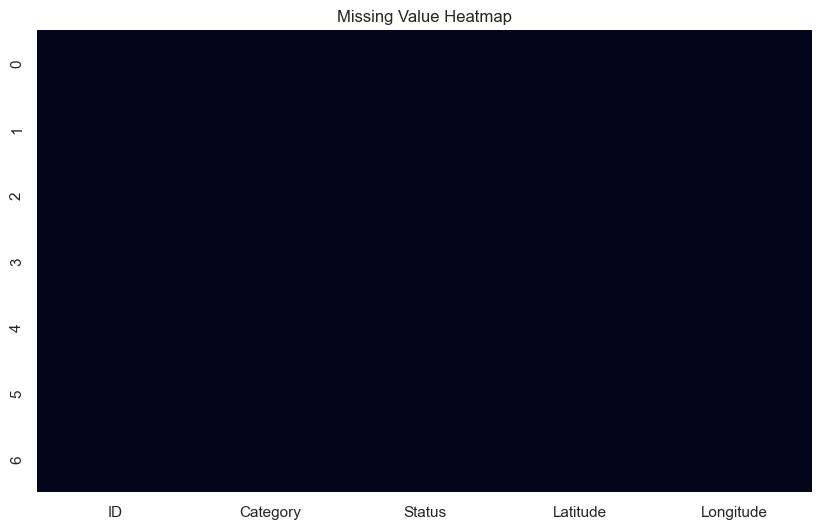

In [26]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [28]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


## 5. Record Ordering and Structural Validation

Since the dataset does not contain explicit time information, records are
analyzed as a static snapshot of civic complaints. The data is first ordered
by unique complaint ID to ensure consistency and reproducibility of analysis.

In [36]:
df = df.sort_values(by='ID')
df.head()

,ID,Category,Status,Latitude,Longitude
0,F4OPSxtzOg1EGQONsTlB,Pothole,Pending,23.077430,76.851349
1,Ga7SsIAZLQTlvdB6rnQM,Waste,Pending,23.072021,76.859953
2,Mh0QFsBbVIwkmTQqAaOt,Waste,Pending,23.076998,76.850470
3,Sq7gIKOYQRBQbugaF58Q,Streetlight,Pending,23.077365,76.851568
4,fEEZG5vmyrE8OEMnuPU9,Waste,Pending,23.077365,76.851568


## 6. Univariate Analysis: Complaint Status

This section analyzes the distribution of complaint statuses to understand
the overall resolution state of civic issues.

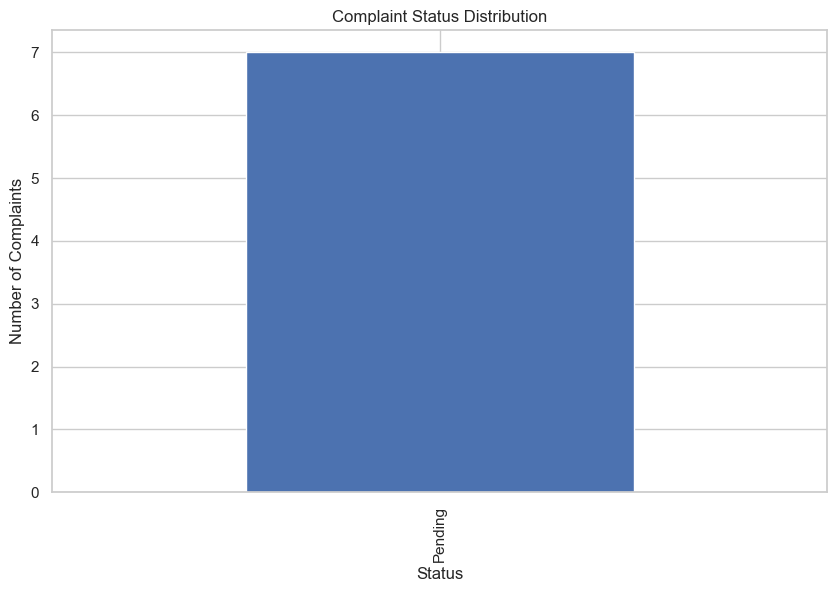

In [39]:
df['Status'].value_counts().plot(kind='bar')
plt.title("Complaint Status Distribution")
plt.ylabel("Number of Complaints")
plt.show()

## 7. Univariate Analysis: Complaint Categories

This section examines the frequency of different complaint categories to
identify dominant civic issues.

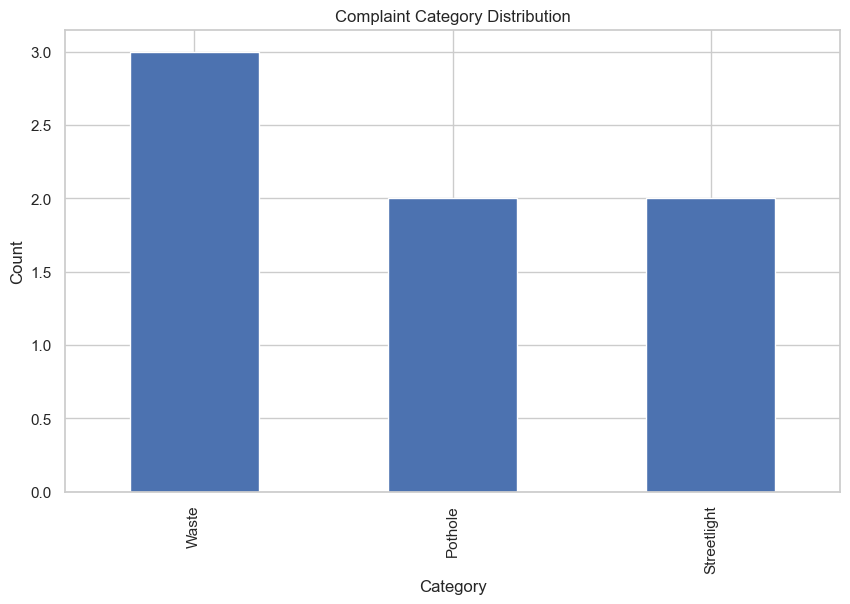

In [42]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Complaint Category Distribution")
plt.ylabel("Count")
plt.show()

## 8. Spatial Distribution of Complaints

This section visualizes how complaints are geographically distributed using
latitude and longitude coordinates.

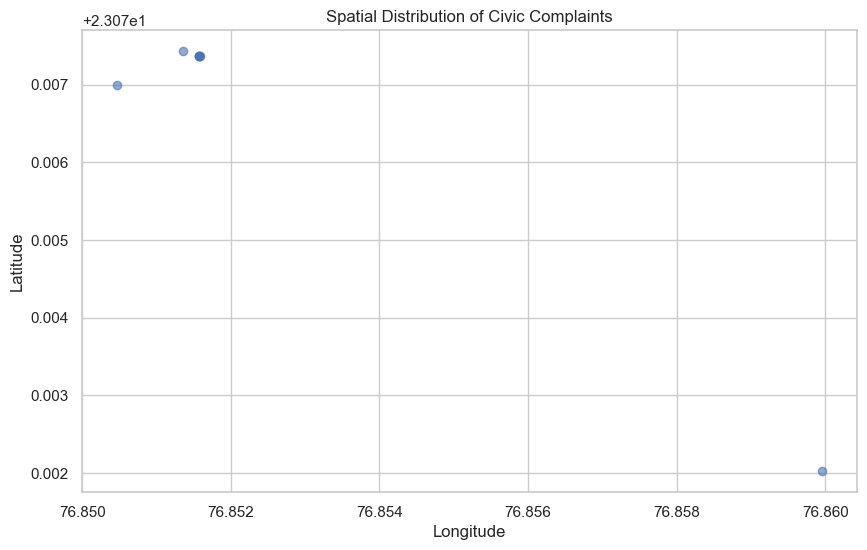

In [45]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Civic Complaints")
plt.show()

## 9. Category-wise Spatial Spread

Different complaint categories may show different spatial concentration
patterns. This section compares their geographic spread.

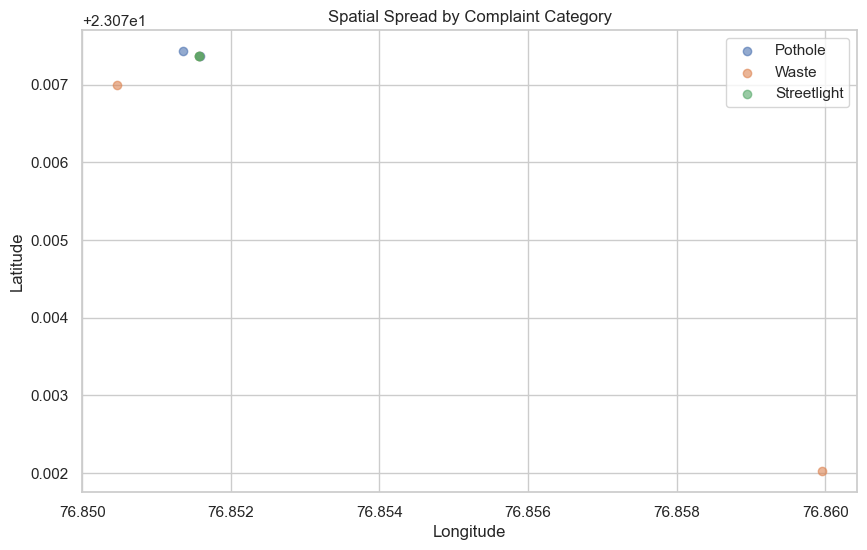

In [48]:
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    plt.scatter(subset['Longitude'], subset['Latitude'], label=category, alpha=0.6)

plt.legend()
plt.title("Spatial Spread by Complaint Category")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## 10. Status vs Category Interaction

This analysis explores how complaint resolution status varies across
different categories.

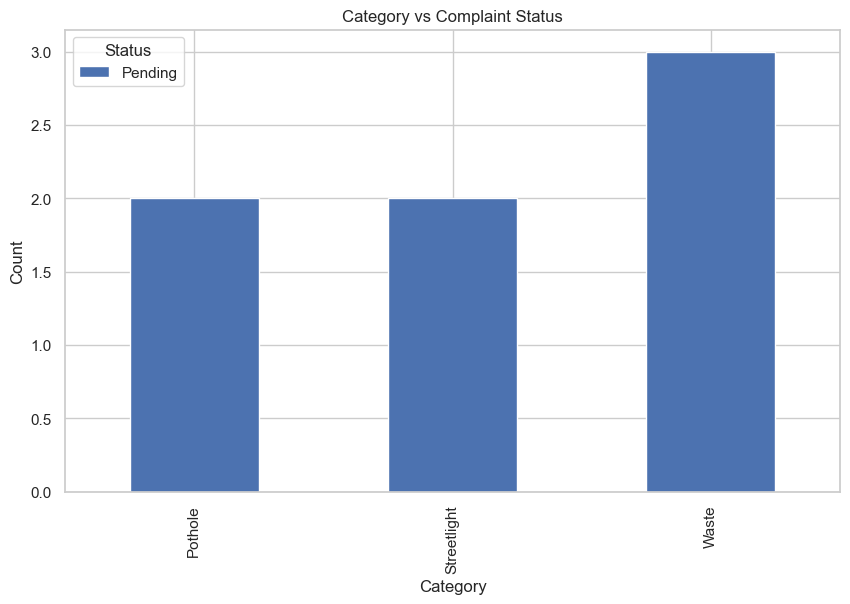

In [51]:
pd.crosstab(df['Category'], df['Status']).plot(kind='bar', stacked=True)
plt.title("Category vs Complaint Status")
plt.ylabel("Count")
plt.show()

## 11. Geospatial Heatmap Analysis

A heatmap is used to visualize regions with a high density of civic complaints.
These dense regions are potential hotspots requiring focused intervention.

In [54]:
m = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=13
)

heat_data = list(zip(df['Latitude'], df['Longitude']))
HeatMap(heat_data).add_to(m)

m

## 12. Spatial Density Approximation

This section estimates local complaint density by counting nearby complaints.
This analysis informs both hotspot detection and priority scoring.

In [57]:
from sklearn.neighbors import NearestNeighbors

coords = df[['Latitude', 'Longitude']].values
nbrs = NearestNeighbors(n_neighbors=5).fit(coords)
distances, _ = nbrs.kneighbors(coords)

df['avg_neighbour_distance'] = distances.mean(axis=1)

df['avg_neighbour_distance'].describe()

count    7.000000
mean     0.001318
std      0.002942
min      0.000048
25%      0.000048
50%      0.000056
75%      0.000537
max      0.007954
Name: avg_neighbour_distance, dtype: float64

## 13. Hypothesis-Driven Exploration

H1: Certain complaint categories are spatially concentrated.
H2: Areas with dense complaints are more likely to have unresolved issues.

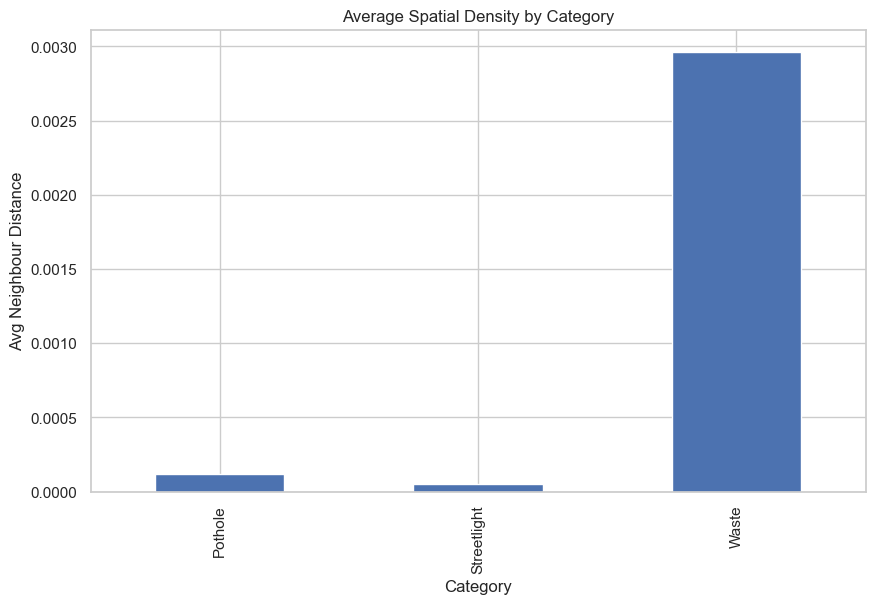

In [60]:
df.groupby('Category')['avg_neighbour_distance'].mean().plot(kind='bar')
plt.title("Average Spatial Density by Category")
plt.ylabel("Avg Neighbour Distance")
plt.show()

## 14. Summary of Key Insights and Justification for ML Models

### Key Observations:
- Complaint distribution is uneven across categories.
- Certain categories show higher unresolved rates.
- Spatial density analysis reveals concentrated complaint zones.
- Heatmap and neighbor-distance analysis confirm natural hotspots.

### Implications for Machine Learning:
- Density-based spatial clustering (DBSCAN) is suitable for hotspot detection.
- Priority classification is justified using category, status, and spatial density.
- Feature engineering is required to convert spatial insights into ML-ready inputs.

This exploratory analysis provides a solid foundation for feature engineering
and subsequent machine learning models.